# Chapter 3: Data Manipulation with Pandas

Pandas is a package built on top of NumPy that provides efficient implementation of a `DataFrame`: milti-dimensional arrays with row and column labels, and often with heterogenous types and/or missing data.

In [34]:
import numpy as np
import pandas as pd
pd.__version__

'1.4.1'

## Introducting Pandas Objects

### The Pandas Series Object

A Pandas `Series` is a one-dimensional array of indexed data.

In [35]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [36]:
# Access the `values` and `index` attributes
data.values, data.index

(array([0.25, 0.5 , 0.75, 1.  ]), RangeIndex(start=0, stop=4, step=1))

In [37]:
# Access values by position
data[1], data[1:3]

(0.5,
 1    0.50
 2    0.75
 dtype: float64)

The key difference between a Pandas `Series` and a 1-d NumPy array is that the former has an *explicitly defined* index, as opposed to implicitly defined.

In [38]:
# Use strings as an index
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
data, data['b']

(a    0.25
 b    0.50
 c    0.75
 d    1.00
 dtype: float64,
 0.5)

In [39]:
# Noncontiguous or nonsequential indices
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = [2, 5, 3, 7])
data, data[5]

(2    0.25
 5    0.50
 3    0.75
 7    1.00
 dtype: float64,
 0.5)

In this way, the `Series` is a bit like a Python dictionary, that maps keys to values. The difference is that the keys and values must be typed.

In [40]:
# Construct a Series from a dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population, population['California']

(California    38332521
 Texas         26448193
 New York      19651127
 Florida       19552860
 Illinois      12882135
 dtype: int64,
 38332521)

In [41]:
# Unlike a dictionary, we can use array-style operations
# Note that, in the text, the keys were automatically sorted alphabetically
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

In [42]:
# A single value will fill the given indices
pd.Series(5, index = [100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [43]:
# Unlike the text, this newer version of Pandas does not automatically sort dictionary keys
pd.Series({2: 'a', 1: 'b', 3: 'c'})

2    a
1    b
3    c
dtype: object

In [44]:
# Explicitly setting the index can return specific values
pd.Series({2: 'a', 1: 'b', 3: 'c'}, index = [3, 2])

3    c
2    a
dtype: object

### The Pandas DataFrame Object

A Pandas `DataFrame` can be thought of as a two-dimensional array with flexible row indicies and column names, or as a sequence of aligned `Series` objects.

In [45]:
# First, create a Series from a dictionary
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [46]:
# Now create a single two-dimensional DataFrame from two Series
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [47]:
# Column and index attributes
states.index, states.columns

(Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object'),
 Index(['population', 'area'], dtype='object'))

In [48]:
# We can access a Series object like we would a dictionary
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [49]:
# A single column DataFrame from a Series
pd.DataFrame(population, columns = ['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


In [50]:
# From a list of dictionaries
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [51]:
# If some keys are missing, Pandas will fill them with NaN
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [52]:
# From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2), columns = ['foo', 'bar'], index = ['a', 'b', 'c'])

,foo,bar
a,0.784014,0.837349
b,0.474900,0.690615
c,0.640652,0.062005


In [53]:
# From astructured NumPy array
A = np.zeros(3, dtype = [('A', 'i8'), ('B', 'f8')])
A, pd.DataFrame(A)


(array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')]),
    A    B
 0  0  0.0
 1  0  0.0
 2  0  0.0)

### The Pandas Index Object

The Pandas `Index` object can be thought of as an *ummutable array* or as an *ordered set*.

In [54]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [55]:
# Access elements like an array
ind[1], ind[::2]

(3, Int64Index([2, 5, 11], dtype='int64'))

In [56]:
# Attributes
ind.size, ind.shape, ind.ndim, ind.dtype

(5, (5,), 1, dtype('int64'))

In [57]:
# Index objects are immutable, so they cannot be modified by normal means
ind[1] = 0

TypeError: Index does not support mutable operations

The Pandas `Index` objects follows many of the conventions used by the built-in `set` data structure.

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])
# intersection
indA & indB

C:\Users\tdunn\AppData\Local\Temp\ipykernel_12224\2322778381.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  indA & indB


Int64Index([3, 5, 7], dtype='int64')

The deprecation warning tells us to use `index.intersection()` instead (likewise for unions and symmetric differences):

In [ ]:
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [ ]:
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [ ]:
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection

### Data Selection in Series

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index = ['a', 'b', 'c', 'd'])
# Dictionary-like expressions to examine keys/indices and values
'a' in data, data.keys(), list(data.items())

(True,
 Index(['a', 'b', 'c', 'd'], dtype='object'),
 [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)])

In [ ]:
# Extend a Series
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [ ]:
# Slicing
# Notice that explicit 'a':'c' slicing includes the last element, but implicit 0:2 slicing does not
data['a':'c'], data[0:2]

(a    0.25
 b    0.50
 c    0.75
 dtype: float64,
 a    0.25
 b    0.50
 dtype: float64)

In [ ]:
# Masking and fancy indexing
data[(data > 0.3) & (data < 0.8)], data[['a', 'e']]

(b    0.50
 c    0.75
 dtype: float64,
 a    0.25
 e    1.25
 dtype: float64)

In [ ]:
data = pd.Series(['a', 'b', 'c'], index = [1, 3, 5])
# Confusion: explicit index vs implicit index when slicing
data[1], data[1:3]

('a',
 3    b
 5    c
 dtype: object)

In [ ]:
# Use Pandas indexers to distinguish slicing interfaces
# `loc` always references explicit index
data.loc[1], data.loc[1:3]

('a',
 1    a
 3    b
 dtype: object)

In [ ]:
# `iloc` always references implicit index
data.iloc[1], data.iloc[1:3]

('b',
 3    b
 5    c
 dtype: object)

### Data Selection in DataFrame

In [ ]:
data = pd.DataFrame({'area': area, 'pop': population})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
# Access the individual Series objects that make up the columns
data['area'] is data.area

True

In [ ]:
# But careful with column names that conflict with methods like `pop()`
data.pop is data['pop']

False

In [ ]:
# Add a new column
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# The `values` attribute returns the underlying 2d array
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
# With this array picture in mind, we can do array-like operations like transpose
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
# But there are important differences from arrays
# Passing a single index to an array accesses a row, passing a single index to a DataFrame access a column
data.values[0], data['area']

(array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01]),
 California    423967
 Texas         695662
 New York      141297
 Florida       170312
 Illinois      149995
 Name: area, dtype: int64)

In [ ]:
# For array-style indexing, use `iloc`
data.iloc[:3, :2], data.loc[:'Texas', :'pop']

(              area       pop
 California  423967  38332521
 Texas       695662  26448193
 New York    141297  19651127,
               area       pop
 California  423967  38332521
 Texas       695662  26448193
 New York    141297  19651127
 Florida     170312  19552860
 Illinois    149995  12882135)

In [ ]:
# The `ix` indexer allows a hybrid of approaches
data.ix[:3, :'pop']

AttributeError: 'DataFrame' object has no attribute 'ix'

It turns out that this form of indexing was deprectated and removed from Pandas.

In [ ]:
# Masking and fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [ ]:
# Setting or modifying values like an array
data.iloc[0, 2] = 90

## Operating on Data in Pandas

### Ufuncs: Index Preservation

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns = ['A', 'B', 'C', 'D'])
ser, df

(0    6
 1    3
 2    7
 3    4
 dtype: int32,
    A  B  C  D
 0  6  9  2  6
 1  7  4  3  7
 2  7  2  5  4)

In [ ]:
# Appllying a NumPy ufunc will returns the same object with the indicies preserved
np.exp(ser), np.sin(df * np.pi / 4)

(0     403.428793
 1      20.085537
 2    1096.633158
 3      54.598150
 dtype: float64,
           A             B         C             D
 0 -1.000000  7.071068e-01  1.000000 -1.000000e+00
 1 -0.707107  1.224647e-16  0.707107 -7.071068e-01
 2 -0.707107  1.000000e+00 -0.707107  1.224647e-16)

### Ufuncs: Index Alignment

In [ ]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name = 'area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name = 'population')
area / population

Alaska             NaN
California    0.011060
New York           NaN
Texas         0.026303
dtype: float64

The resulting array contains the *union* of indices of the two inputs, and any item with a missing entry is marked with `NaN`.

In [ ]:
A = pd.Series([2, 4, 6], index = [0, 1, 2])
B = pd.Series([1, 3, 5], index = [1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [ ]:
# Use the appropriate methods to provide `fill_value`
A.add(B, fill_value = 0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [ ]:
# Alignment by column and index
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns = list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns = list('BAC'))
A, B, A + B

(    A   B
 0  15  12
 1  17  14,
    B  A  C
 0  4  7  9
 1  8  8  0
 2  8  6  8,
       A     B   C
 0  22.0  16.0 NaN
 1  25.0  22.0 NaN
 2   NaN   NaN NaN)

In [ ]:
# Stack rows and get the mean of all values
A_mean = A.stack().mean()
# Fill missing values with mean of A
A.add(B, fill_value = A_mean)

,A,B,C
0,22.0,16.0,23.5
1,25.0,22.0,14.5
2,20.5,22.5,22.5


### Ufuncs: Operations Between DataFrame and Series

In [ ]:
# Subtracting a 2-d array from one of its rows is applied row-wise
# Array broadcasting: (3, 4) - (1, 4) -> (3, 4)
A = rng.randint(10, size = (3, 4))
A, A  - A[0]

(array([[7, 0, 7, 7],
        [2, 0, 7, 2],
        [2, 0, 4, 9]]),
 array([[ 0,  0,  0,  0],
        [-5,  0,  0, -5],
        [-5,  0, -3,  2]]))

In [ ]:
# Pandas also operates row-wise by default
df = pd.DataFrame(A, columns = list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-5,0,0,-5
2,-5,0,-3,2


In [ ]:
# Column-wise operations can be done with the object methods and `axis` argument
df.subtract(df['R'], axis = 0)

,Q,R,S,T
0,7,0,7,7
1,2,0,7,2
2,2,0,4,9


In [ ]:
# Operations betwen DataFrames and Series will align indices
df_half_rows = df.iloc[0, ::2]
df_half_rows, df - df_half_rows

(Q    7
 S    7
 Name: 0, dtype: int32,
      Q   R    S   T
 0  0.0 NaN  0.0 NaN
 1 -5.0 NaN  0.0 NaN
 2 -5.0 NaN -3.0 NaN)

## Handling Missing Data

### Missing Data in Pandas

Pandas uses *sentinels* for missing data, which are values that indicate missing.
Specifically, Pandas uses the special floating-point `NaN` value and the Python `None` object.

In [ ]:
# The None object can only be used in NuMpy arrays of dtype 'object'
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
# Arrays of dtype 'object' are much slower than numeric types (due to overhead involved with objects)

for dtype in ['object', 'int']:
    print("dtype = ", dtype)
    %timeit np.arange(1E6, dtype = dtype).sum()
    print()

dtype =  object
67.9 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype =  int
1.71 ms ± 13.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



In [ ]:
# `None` will also throw errors when attempting some methods
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [ ]:
# The `NaN` representation is floating point
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [ ]:
# `NaN` infects any other object it touches
1 + np.nan, 0 * np.nan, vals2.sum(), vals2.min()

NameError: name 'val2' is not defined

In [ ]:
# Ignore missing values with special methods
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

In [ ]:
# Pandas will convert between missing values appropriately
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
# Upcasting from int to float, and converting None to NaN
x = pd.Series(range(2), dtype = int)
x[0] = None
x

0    NaN
1    1.0
dtype: float64

As noted in the text, at the time of writing there was a proposal to add a native `NA` to Pandas.
This was added in version 1.0 to denote missing integers, booleans, or strings, but [is still considered experimental](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data-na).

In [ ]:
x = pd.Series(range(2), dtype = int)
x[0] = pd.NA
x

0    <NA>
1       1
dtype: object

### Operating on Null Values

In [ ]:
# Generate a boolean mask to indicate missing values
data = pd.Series([1, np.nan, 'hello', None])
data, data.isnull(), data[data.notnull()]

(0        1
 1      NaN
 2    hello
 3     None
 dtype: object,
 0    False
 1     True
 2    False
 3     True
 dtype: bool,
 0        1
 2    hello
 dtype: object)

In [ ]:
# Drop NA values
data.dropna()

0        1
2    hello
dtype: object

In [ ]:
# Drop NA values by row or column
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df.dropna(), df.dropna(axis = 'columns')

(     0    1  2
 1  2.0  3.0  5,
    2
 0  2
 1  5
 2  6)

In [ ]:
# Drop columns with all NA values with the `how` argument
df[3] = np.nan
df, df.dropna(axis = 'columns', how = 'all')

(     0    1  2   3
 0  1.0  NaN  2 NaN
 1  2.0  3.0  5 NaN
 2  NaN  4.0  6 NaN,
      0    1  2
 0  1.0  NaN  2
 1  2.0  3.0  5
 2  NaN  4.0  6)

In [ ]:
# Drop rows with a minimum number of NA values with `thresh`
df.dropna(axis = 'rows', thresh = 3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [ ]:
# Fill null values
data = pd.Series([1, np.nan, 2, None, 3], index = list('abcde'))
data, data.fillna(0), data.fillna(method = 'ffill'), data.fillna(method = 'bfill')

(a    1.0
 b    NaN
 c    2.0
 d    NaN
 e    3.0
 dtype: float64,
 a    1.0
 b    0.0
 c    2.0
 d    0.0
 e    3.0
 dtype: float64,
 a    1.0
 b    1.0
 c    2.0
 d    2.0
 e    3.0
 dtype: float64,
 a    1.0
 b    2.0
 c    2.0
 d    3.0
 e    3.0
 dtype: float64)

In [ ]:
# Note that, if there is not a previous value during forward fill, NA remains
df.fillna(method = 'ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## Hierarchical Indexing

### A Multiply Indexed Series

Consider some data about states from two different years. Here is a bad way to store that data in `Series`:

In [58]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [ ]:
# Then we can index and slice like:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [ ]:
# But then if we need to select all values from 2010
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

The better way is to use the Pandas `MultiIndex`:

In [59]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [60]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [ ]:
# Then to access all data from 2010
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

Alternatively, we could have stored the same ata using a simple `DataFrame`.
In fact, Pandas is built with this equivalence in mind.

In [61]:
# The `unstack()` method will convert Series with multiplie indices to a DataFrame
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [62]:
# And undo with `stack()`
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

Add an extra level to make a three-dimensional DataFrame:

In [63]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [ ]:
# Compute fraction of people under 18 by year
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

(                2000      2010
 California  0.273594  0.249211
 New York    0.247010  0.222831
 Texas       0.283251  0.273568,
 California  2000    0.273594
             2010    0.249211
 New York    2000    0.247010
             2010    0.222831
 Texas       2000    0.283251
             2010    0.273568
 dtype: float64)

### Methods of MultiIndex Creation

In [ ]:
# Most straightforward: a list of lists
df = pd.DataFrame(np.random.rand(4, 2),
                  index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns = ['data1', 'data2'])
df

data1     data2
a 1  0.433495  0.234538
  2  0.728100  0.602348
b 1  0.447913  0.266430
  2  0.050424  0.862369

In [ ]:
# A dictionary with tuples
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
# From a list of arrays or tuples
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]]), pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

(MultiIndex([('a', 1),
             ('a', 2),
             ('b', 1),
             ('b', 2)],
            ),
 MultiIndex([('a', 1),
             ('a', 2),
             ('b', 1),
             ('b', 2)],
            ))

In [ ]:
# From a Carteisan product 
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

The current version of `pd.MultiIndex()` does not support a `labels` argument -- maybe it was re-named to `codes`?

In [ ]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes = [[0, 0, 1, 1], [0, 1, 0, 1]])


MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [64]:
# MultiIndex levels can have names
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

A `MultiIndex` can be constructed for columns as well:

In [65]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names = ['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names = ['subject', 'type'])

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index = index, columns = columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  38.0  47.0  36.2  45.0  37.4
     2      35.0  36.2  33.0  36.0  28.0  36.0
2014 1      44.0  38.2  28.0  37.8  33.0  36.8
     2      25.0  38.1  25.0  36.4  39.0  39.2

In [ ]:
# Index just a single person
health_data['Guido']

type          HR  Temp
year visit            
2013 1      41.0  36.7
     2      39.0  37.1
2014 1      17.0  36.0
     2      41.0  36.1

### Indexing and Slicing a MultiIndex

In [ ]:
# Access single elements with multiple terms
pop['California', 2000]

33871648

In [ ]:
# Access a Series from a single index
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [ ]:
# Partial slicing is available as long as the MultiIndex is sorted
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [ ]:
# Partial indexing on lower levels by passing empty slice `:`
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [ ]:
# Boolean masking and fancy indexing
pop[pop > 22000000], pop[['California', 'Texas']]

(state       year
 California  2000    33871648
             2010    37253956
 Texas       2010    25145561
 dtype: int64,
 state       year
 California  2000    33871648
             2010    37253956
 Texas       2000    20851820
             2010    25145561
 dtype: int64)

In [ ]:
# In DataFrames, columns are primary for indexing
health_data['Guido', 'HR'], health_data.iloc[:2, :2]

(year  visit
 2013  1        41.0
       2        39.0
 2014  1        17.0
       2        41.0
 Name: (Guido, HR), dtype: float64,
 subject      Bob       Guido
 type          HR  Temp    HR
 year visit                  
 2013 1      38.0  36.0  41.0
      2      38.0  37.3  39.0
 2014 1      45.0  36.4  17.0)

In [ ]:
# Pass a tuple of indices with `loc`
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        38.0
      2        38.0
2014  1        45.0
      2        48.0
Name: (Bob, HR), dtype: float64

In [ ]:
# Slicing a tuple doesn't work
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (3869254613.py, line 2)

In [ ]:
# Use pd.IndexSlice instead
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,38.0,41.0,47.0
2014,1,45.0,17.0,44.0


### Rearranging Multi-Indices

Many multi-index slicing operations will fail if the index is not sorted.

In [ ]:
# Create some data where the indices are not lexographically sorted
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.102690
      2      0.513217
c     1      0.148254
      2      0.835781
b     1      0.045137
      2      0.860872
dtype: float64

In [ ]:
# Try to take a partial slice
try:
    data['a': 'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [ ]:
# Sort the index
data = data.sort_index()
data, data['a': 'b']

(char  int
 a     1      0.102690
       2      0.513217
 b     1      0.045137
       2      0.860872
 c     1      0.148254
       2      0.835781
 dtype: float64,
 char  int
 a     1      0.102690
       2      0.513217
 b     1      0.045137
       2      0.860872
 dtype: float64)

In [68]:
# Convert from multi-index to 2-dimensional data
pop.unstack(level=0), pop.unstack(level = 1)

(state  California  New York     Texas
 year                                 
 2000     33871648  18976457  20851820
 2010     37253956  19378102  25145561,
 year            2000      2010
 state                         
 California  33871648  37253956
 New York    18976457  19378102
 Texas       20851820  25145561)

In [69]:
# unstack() undos stack()
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [71]:
# Another way to re-arrange hierarchical data is to turn the index labels into column
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [76]:
# To create indices from columns, use `set_index()`
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### Data Aggregation on Mutli-Indices

In [77]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      45.0  38.0  47.0  36.2  45.0  37.4
     2      35.0  36.2  33.0  36.0  28.0  36.0
2014 1      44.0  38.2  28.0  37.8  33.0  36.8
     2      25.0  38.1  25.0  36.4  39.0  39.2

In [79]:
# Average measurements in the two visits each year
health_data.mean(level='year')

C:\Users\tdunn\AppData\Local\Temp\ipykernel_21080\4165984930.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  health_data.mean(level='year')


subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     40.0  37.10  40.0  36.1  36.5  36.7
2014     34.5  38.15  26.5  37.1  36.0  38.0

Note the deprecation warning. Here is the new approach:

In [84]:
data_mean = health_data.groupby(level = 'year').mean()
data_mean

subject   Bob        Guido         Sue      
type       HR   Temp    HR  Temp    HR  Temp
year                                        
2013     40.0  37.10  40.0  36.1  36.5  36.7
2014     34.5  38.15  26.5  37.1  36.0  38.0

In [85]:
# Aggregate by columns with the `axis = 1` argument
data_mean.groupby(level = 'type', axis = 1).mean()

type,HR,Temp
year,,
2013,38.833333,36.633333
2014,32.333333,37.750000


## Combining Datasets: Concat and Append

In [88]:
# For convenience, a function to make a data frame
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [91]:
# Recall the concatenation of two or more arrays
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis = 1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

In [95]:
# pd.concat() for Series or DataFrame objects
ser1 = pd.Series(['A', 'B', 'C'], index = [1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index = [4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [98]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
# By default, `axis = 0` or `rows` will bind rows
print(df1), print(df2), print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


(None, None, None)

In [103]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3), print(df4), print(pd.concat([df3, df4], axis = 'columns'))

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


(None, None, None)

In [104]:
# Note that pandas will preserve duplicate indicies
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index
print(x), print(x), print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A0  B0
1  A1  B1
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


(None, None, None)

In [105]:
# A few ways to deal with repeated indices
# One: raise an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [106]:
# Two: ignore the index
pd.concat([x, y], ignore_index=True)

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [108]:
# Three: adding multiindex keys
pd.concat([x, y], keys = ['x', 'y'])

A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [111]:
# Concatenation with joins
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
# By default, non-available data is filled with NA values
print(df5); print(df6); print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [112]:
# Specify the `join` argument
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


The `join_axes` argument to `pd.concat()` is deprecated. The new way is to `reindex()`:

In [142]:
pd.concat([df5, df6]).reindex(columns=df5.columns)

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [143]:
# The `append()` method for chaining
df1.append(df2)

C:\Users\tdunn\AppData\Local\Temp\ipykernel_21080\3684622328.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2)


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Note the deprecation warning. As they say in the text, `append()` is not as efficient as `concat()`, so it is generally better to use the latter.

## Combing Datasets: Merge and Join

The `pd.merge()` function implements these types of joins: *one-to-one*, *many-to-one*, and *many-to-many* joins.

In [149]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [151]:
# One-to-one, very similar to column-wise concatenation from previous section
# Here, the function automatically recognize the shared `employee` column as the key
# Note that the index is reset
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [152]:
# Many-to-one joins
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [153]:
# Many-to-many joins
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(pd.merge(df1, df5))

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In [154]:
# Specify the merge key with the `on` keyword
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [155]:
# Or with the `left_on`/`right_on` keywords
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [157]:
# We can then `drop()` the redundant column
pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis = 1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [159]:
# Merge on an index with `left_index`/`right_index` boolean flags
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [160]:
# Chain with the `join()` method, which defaults to indices
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [161]:
# Mix indices and columns
pd.merge(df1a, df3, left_index=True, right_on='name')

,group,name,salary
0,Accounting,Bob,70000
1,Engineering,Jake,80000
2,Engineering,Lisa,120000
3,HR,Sue,90000


Of note, all of the above `merge` and `join` methods work with multiple indices and columns as well.

In [162]:
# When key values are missing, the default is to return just the intersection of the two inputs
# The argument for this is `how = 'inner'`
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


In [166]:
# 'outer', 'left', and 'right' are other options
pd.merge(df6, df7, how='outer'), pd.merge(df6, df7, how='left'), pd.merge(df6, df7, how='right'),


(     name   food drink
 0   Peter   fish   NaN
 1    Paul  beans   NaN
 2    Mary  bread  wine
 3  Joseph    NaN  beer,
     name   food drink
 0  Peter   fish   NaN
 1   Paul  beans   NaN
 2   Mary  bread  wine,
      name   food drink
 0    Mary  bread  wine
 1  Joseph    NaN  beer)

In [167]:
# In the case of overlapping column names, the suffix `_x` or `_y` is appended
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
pd.merge(df8, df9, on="name")

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [170]:
# Define a custom suffix
pd.merge(df8, df9, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [172]:
# Example: US States data
#!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
#!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
#!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 57935  100 57935    0     0   238k      0 --:--:-- --:--:-- --:--:--  238k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   835  100   835    0     0   2953      0 --:--:-- --:--:-- --:--:--  2960
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   872  100   872    0     0   3216      0 --:

In [174]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head(), areas.head(), abbrevs.head()

(  state/region     ages  year  population
 0           AL  under18  2012   1117489.0
 1           AL    total  2012   4817528.0
 2           AL  under18  2010   1130966.0
 3           AL    total  2010   4785570.0
 4           AL  under18  2011   1125763.0,
         state  area (sq. mi)
 0     Alabama          52423
 1      Alaska         656425
 2     Arizona         114006
 3    Arkansas          53182
 4  California         163707,
         state abbreviation
 0     Alabama           AL
 1      Alaska           AK
 2     Arizona           AZ
 3    Arkansas           AR
 4  California           CA)

In [192]:
pop_abbrev = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
# Drop the duplicate column
pop_abbrev = pop_abbrev.drop('abbreviation', axis = 1)
pop_abbrev.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [193]:
# Double-check for missing values
pop_abbrev.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [194]:
# The null values in population are from PR
pop_abbrev[pop_abbrev['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [199]:
# The null values in state
pop_abbrev[pop_abbrev['state'].isnull()]['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [200]:
# We can fill in these values easily
pop_abbrev.loc[pop_abbrev['state/region'] == 'PR', 'state'] = 'Puerto Rico'
pop_abbrev.loc[pop_abbrev['state/region'] == 'USA', 'state'] = 'United States'
pop_abbrev.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [202]:
# Merge with area data
pop_area = pd.merge(pop_abbrev, areas, on='state', how='left')
pop_area.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [203]:
pop_area.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [205]:
# Check the null areas values
pop_area[pop_area['area (sq. mi)'].isnull()]['state'].unique()

array(['United States'], dtype=object)

In [206]:
# In this case, just drop the null values as it is not relevant
pop_area.dropna(inplace=True)
pop_area.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [215]:
# Use the `query()` method to get all data from 2010
pop_area_2010 = pop_area.query("year == 2010 & ages == 'total'")
pop_area_2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [216]:
# Index on state
pop_area_2010.set_index('state', inplace=True)
# Compute density
pop_density_2010 = pop_area_2010['population'] / pop_area_2010['area (sq. mi)']
# Sort by descending density
pop_density_2010.sort_values(ascending=False, inplace=True)
# Top 5
pop_density_2010.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [217]:
# And the bottom 5
pop_density_2010.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [218]:
# Load the planets data set from `seaborn`
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [219]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [220]:
# Series aggregation
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser, ser.sum(), ser.mean(), ser.median()

(0    0.374540
 1    0.950714
 2    0.731994
 3    0.598658
 4    0.156019
 dtype: float64,
 2.811925491708157,
 0.5623850983416314,
 0.5986584841970366)

In [223]:
# DataFrame aggregation
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df, df.mean()

(          A         B
 0  0.183405  0.611853
 1  0.304242  0.139494
 2  0.524756  0.292145
 3  0.431945  0.366362
 4  0.291229  0.456070,
 A    0.347115
 B    0.373185
 dtype: float64)

In [224]:
# Specify axis to aggregate within rows
df.mean(axis = 'columns')

0    0.397629
1    0.221868
2    0.408451
3    0.399153
4    0.373650
dtype: float64

In [225]:
# Use `describe()` to compute several common aggregates for each column
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [227]:
# Use `groupby()` to split, apply and combine
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [229]:
# Returns a special object/view of the DataFrame
df.groupby('key')

In [231]:
# Apply `sum()`
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [233]:
# Select a Series by 'method' group, no computation done yet
planets.groupby('method')['orbital_period']

In [234]:
# Performing the computation
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [235]:
# `groupby()` suppoers direct iteration
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [239]:
# Dispatch methods
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [245]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': list('ABCABC'), 'data1': range(6), 'data2': rng.randint(0, 10, 6)})
df


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [246]:
# The `aggregate()` method offers more flexibility
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [247]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [248]:
# Filtering to drop data
# A function to filter groups with SD < 4
def filter_func(x):
    return x['data2'].std() > 4

df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [249]:
# `transform()` for returning transformed versions of the full data
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [251]:
# `apply()` for arbitrary functions
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


In [255]:
# Split by a list matching the length of the DataFrame
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


In [256]:
# Split by a dictionary that maps index to group
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': "consonant"}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8


In [257]:
# Passing a Python function will apply to the index
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [258]:
# Combine two key choices for a multi-index
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


In [263]:
# Count discovered planets by method and decade
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

Pivot tables take column-wise data and groups the entries into a two-dimensional table that provides a multi-dimensional summary of the data.

In [264]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [267]:
# Survival rate by sex
# Note that the double square brackets returns a DataFrame instead of a Series with single brackets
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [270]:
# Survival rate by sex and class, unstacking to pivot wider
titanic.groupby(['sex', 'class'])[['survived']].mean().unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

This two-dimensional `groupby()` and `unstack()` is common enough that Pandas includes a `pivot_table()` method for convenience.

In [271]:
titanic.pivot_table('survived', index = 'sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [273]:
# Get survival by binned age, sex and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [277]:
# Get survival by fare, age, sex, class
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [280]:
# Specify the values and functions with `aggfunc`
titanic.pivot_table(index = 'sex', columns = 'class',
                    aggfunc = {'survived': sum, 'fare': np.mean})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [281]:
# Add totals along each grouping
titanic.pivot_table('survived', index = 'sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [282]:
# Example: birthrate data
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  258k  100  258k    0     0   617k      0 --:--:-- --:--:-- --:--:--  618k


In [283]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [293]:
births['decade'] = 10 * (births['year'] // 10)
# The `groupby` approach
births.groupby(['decade', 'gender'])['births'].sum().unstack()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [296]:
births.pivot_table(index = 'decade', columns = 'gender', values = 'births', aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


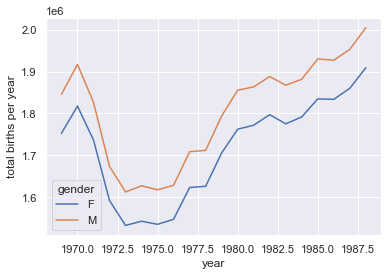

In [310]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
births.pivot_table('births', index='year', columns='gender', aggfunc=sum).plot()
plt.ylabel('total births per year');


In [312]:
# Do some data cleaning
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.75 * (quartiles[2] - quartiles[0])
# Filter out rows outside this range
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [315]:
# Set `day` to an integer
births.loc[:, 'day'] = births['day'].astype(int)

In [319]:
# Combine day month and year to create a Date index
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format = "%Y%m%d")
births['dayofweek'] = births.index.day_of_week


C:\Users\tdunn\AppData\Local\Temp\ipykernel_21080\2813874269.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


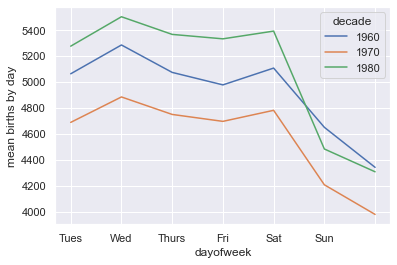

In [321]:
# Births by day of week
births.pivot_table('births', index = 'dayofweek', columns = 'decade', aggfunc=np.mean).plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [325]:
# Births by day of the year
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [326]:
# The `pd.datetime()`` function is deprecate
from datetime import datetime
# To make this easily plottable, convert to a date with a dummy year (has to be a leap year)
births_by_date.index = [datetime(2012, month, day) for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<AxesSubplot:>

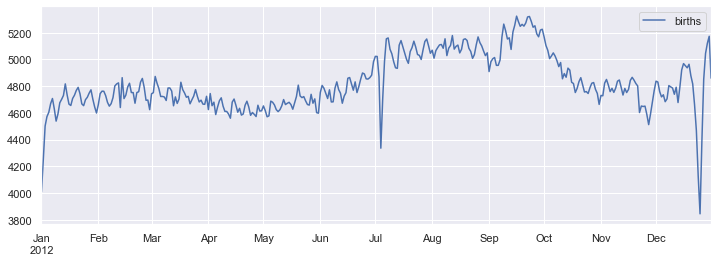

In [327]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = ax)

## Vectorized String Operations

## Working with Time Series

## High-Performance Pandas: eval() and query()